In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [44]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [45]:
len(X)

150

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

K NeighborsClassifier

In [47]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
print(clf.score(X_test, y_test))

0.8444444444444444


K 찾기

cross_validation - 데이터의 개수가 적을 때 사용

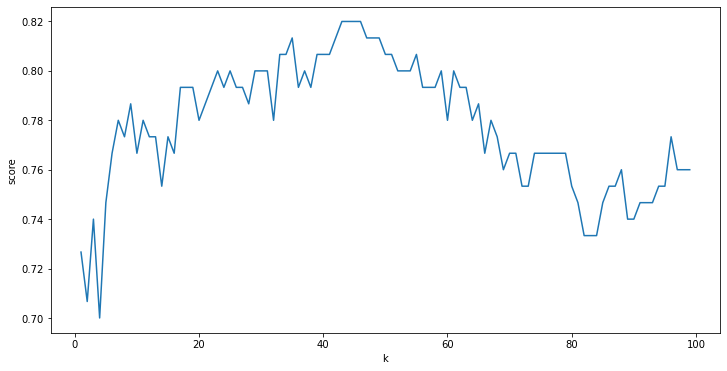

In [49]:
from sklearn.model_selection import cross_val_score


scores = []
for k in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    scores.append(score.mean())

plt.figure(figsize = (12,6))
plt.plot(range(1,100), scores)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

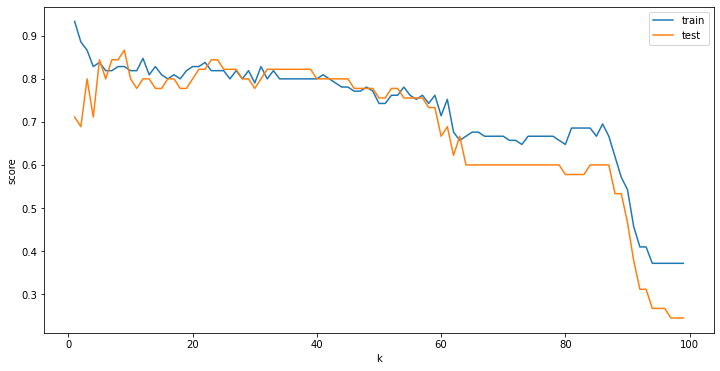

In [50]:
train_scores = []
test_scores = []
for k in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.figure(figsize = (12,6))   
plt.plot(range(1,100), train_scores, label = 'train')
plt.plot(range(1,100), test_scores, label = 'test')
plt.legend()
plt.xlabel("k")
plt.ylabel("score")
plt.show()

가중치 부여 - 더 가중치가 가까운 곳을 따르게 해서 boundary가 부드럽게 나타난다.

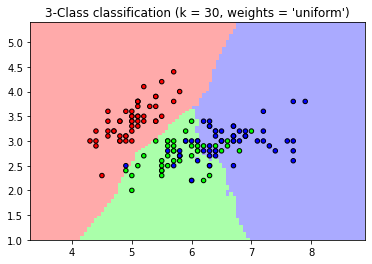

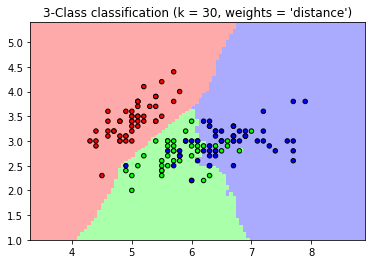

In [53]:
n_neighbors = 30


h = .02  

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

In [11]:
breast = datasets.load_breast_cancer()

In [12]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
X = breast.data[:,:6]
#X = breast.data
y = breast.target

In [15]:
breast_df = pd.DataFrame(X, columns=breast.feature_names[:6])
#breast_df = pd.DataFrame(X, columns=breast.feature_names)

<Figure size 2160x1080 with 0 Axes>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


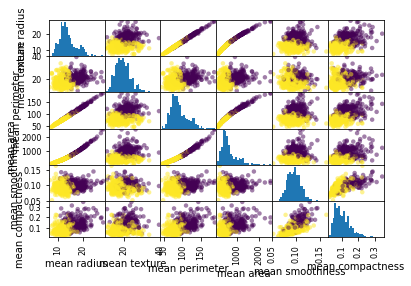

In [16]:
from pandas.plotting import scatter_matrix

plt.figure(figsize = (30, 15))
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 


scatter_matrix(breast_df, c=y, hist_kwds={'bins':30}, marker='o', s=20, alpha=0.5) 
plt.show()

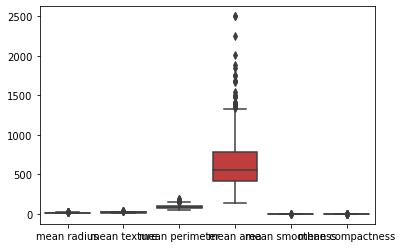

In [17]:
import seaborn as sns
sns.boxplot(data = breast_df)

knn이 area 변수에 영향을 많이 받았다는 것을 의미한다. 따라서 정규화 과정을 수행해야한다.

In [18]:
breast_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [17]:
breast_df.shape

(569, 6)

In [19]:
#최대 최소 값을 사용하여 정규화 - 0과 1 사이의 값
normalization_df = (breast_df - breast_df.min())/(breast_df.max() - breast_df.min())
normalization_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


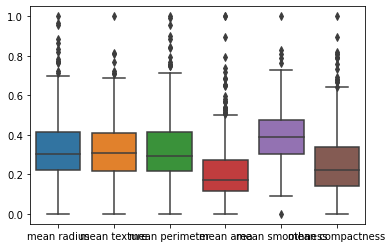

In [21]:
sns.boxplot(data = normalization_df)
plt.show()

In [22]:
#표준편차를 사용하여 정규화 - 0에 맞추어 정규화
normalization_df2 = (breast_df - breast_df.mean())/breast_df.std()
normalization_df2.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.142575e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.083788e-15,-1.081346e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00


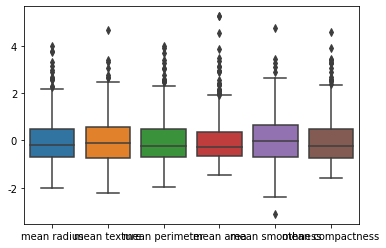

In [23]:
sns.boxplot(data = normalization_df2)

표준편차를 사용한 정규화는 특이값에 대해 더 유연하게 대처할 수 있다는 장점이 있다.

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalization_df2, y, test_size=0.3, random_state=100)

In [27]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 7)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.9298245614035088


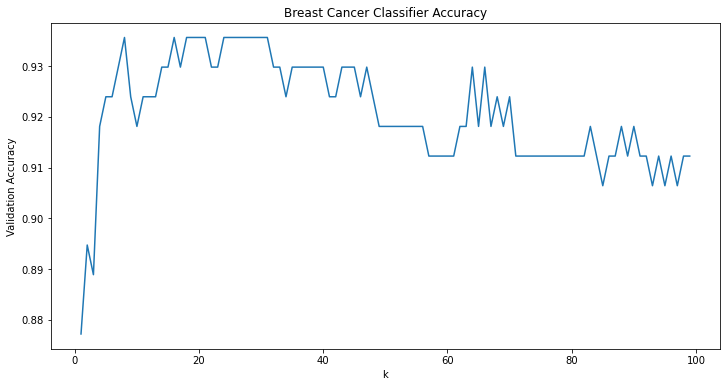

In [28]:
scores = []

for k in range(1,100):
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))

plt.figure(figsize = (12, 6))
plt.plot(range(1,100), scores)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

WINE DATA 셋 로드

데이터 분포 시각화

정규화 수행 유무 / 최적의 k 찾기 + 가중치 부여 유무 / 최선의 정확도  
html파일로

In [36]:
wine = datasets.load_wine()

In [37]:
wine.data[:,:6]

array([[ 14.23,   1.71,   2.43,  15.6 , 127.  ,   2.8 ],
       [ 13.2 ,   1.78,   2.14,  11.2 , 100.  ,   2.65],
       [ 13.16,   2.36,   2.67,  18.6 , 101.  ,   2.8 ],
       ...,
       [ 13.27,   4.28,   2.26,  20.  , 120.  ,   1.59],
       [ 13.17,   2.59,   2.37,  20.  , 120.  ,   1.65],
       [ 14.13,   4.1 ,   2.74,  24.5 ,  96.  ,   2.05]])

In [38]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [39]:
wine_X = wine.data
wine_y = wine.target

In [40]:
wine_df = pd.DataFrame(wine_X[:,:6], columns=wine.feature_names[:6])

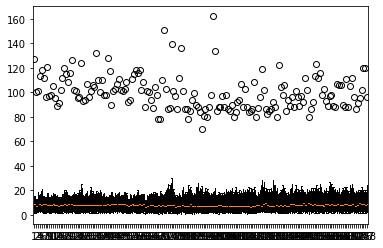

In [41]:
plt.boxplot(wine_df)
plt.show()

In [42]:
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols
0      14.23        1.71  2.43               15.6      127.0           2.80
1      13.20        1.78  2.14               11.2      100.0           2.65
2      13.16        2.36  2.67               18.6      101.0           2.80
3      14.37        1.95  2.50               16.8      113.0           3.85
4      13.24        2.59  2.87               21.0      118.0           2.80
..       ...         ...   ...                ...        ...            ...
173    13.71        5.65  2.45               20.5       95.0           1.68
174    13.40        3.91  2.48               23.0      102.0           1.80
175    13.27        4.28  2.26               20.0      120.0           1.59
176    13.17        2.59  2.37               20.0      120.0           1.65
177    14.13        4.10  2.74               24.5       96.0           2.05

[178 rows x 6 columns]


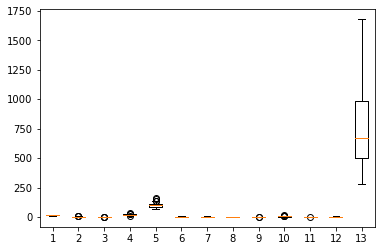

In [32]:
plt.boxplot(wine_X)
plt.show()

In [33]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols
0,14.23,1.71,2.43,15.6,127.0,2.80
1,13.20,1.78,2.14,11.2,100.0,2.65
2,13.16,2.36,2.67,18.6,101.0,2.80
3,14.37,1.95,2.50,16.8,113.0,3.85
4,13.24,2.59,2.87,21.0,118.0,2.80
...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68
174,13.40,3.91,2.48,23.0,102.0,1.80
175,13.27,4.28,2.26,20.0,120.0,1.59
176,13.17,2.59,2.37,20.0,120.0,1.65


<Figure size 2160x1080 with 0 Axes>

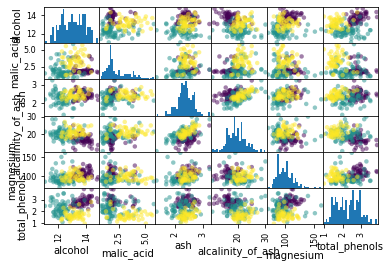

In [35]:
from pandas.plotting import scatter_matrix

plt.figure(figsize = (30, 15))
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 
#breast_df = pd.DataFrame(X, columns=breast.feature_names[:6])

scatter_matrix(wine_df, c=wine_y, hist_kwds={'bins':30}, marker='o', s=20, alpha=0.5) 
plt.show()

In [43]:
n_neighbors = 30


h = .02  

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors, weights=weights)
    clf.fit(wine_X, wine_y)

    x_min, x_max = wine_X[:, 0].min() - 1, wine_X[:, 0].max() + 1
    y_min, y_max = wine_X[:, 1].min() - 1, wine_X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

ValueError: query data dimension must match training data dimension